In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import math
import os

# check file names
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if (filename == "train.csv"):
            # get dataset
            dataset = pd.read_csv(os.path.join(dirname, filename)) # make dataset URL and read csv file     

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Count'>

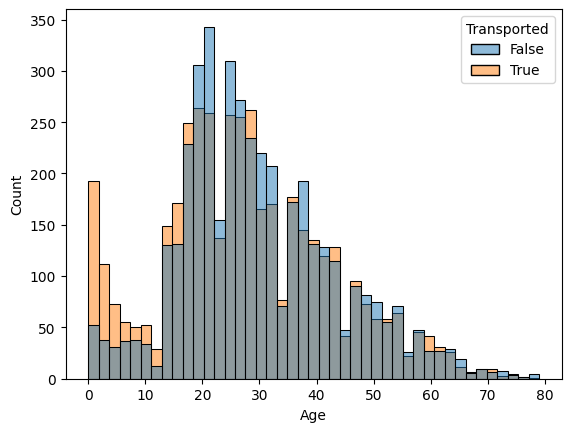

In [2]:
# draw Age-Transported graph
sns.histplot(x="Age",hue="Transported",data=dataset)

<Axes: xlabel='VIP', ylabel='count'>

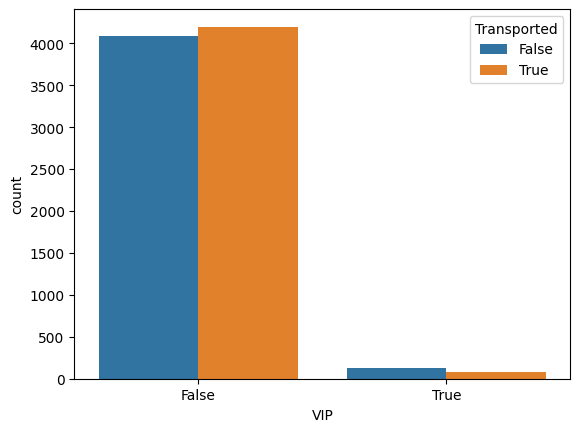

In [3]:
# draw VIP-Transported graph
sns.countplot(x="VIP",hue="Transported",data=dataset)

<Axes: xlabel='Destination', ylabel='count'>

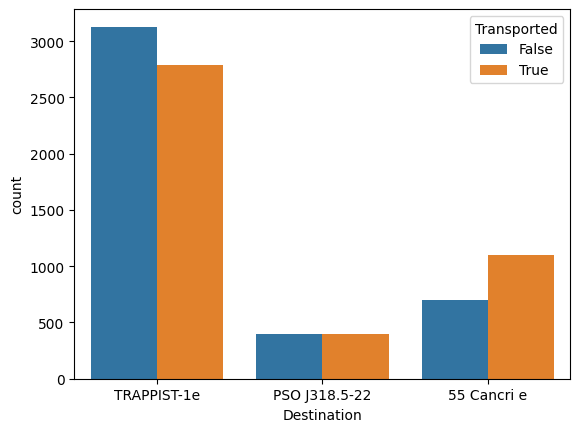

In [4]:
# draw Destination-Transported graph
sns.countplot(x="Destination",hue="Transported",data=dataset)

<Axes: xlabel='HomePlanet', ylabel='count'>

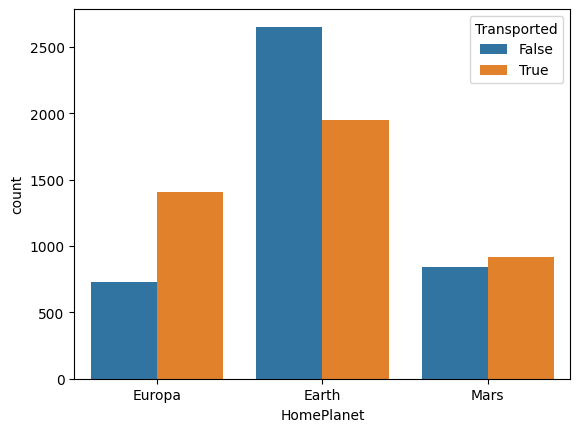

In [5]:
# draw HomePlanet-Transported graph
sns.countplot(x="HomePlanet",hue="Transported",data=dataset)

In [6]:
# separate cabin data
# Cabindeck,CabinPort : convert Null to XX
# CabinNum : convet Null to -1
df = dataset.assign(CabinDeck="XX").assign(CabinNum=-1).assign(CabinPort="XX") # add cal

# get row taple data by iterrows
for index,row in df[::].iterrows():
    cabin = str(row["Cabin"]).split("/")
    if(len(cabin) != 3):
        continue
    for i in range(3):
        df.iat[index,14+i] = cabin[i] # set data pos by iat

/tmp/ipykernel_13/1761624933.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iat[index,14+i] = cabin[i] # set data pos by iat


<Axes: xlabel='CabinDeck', ylabel='count'>

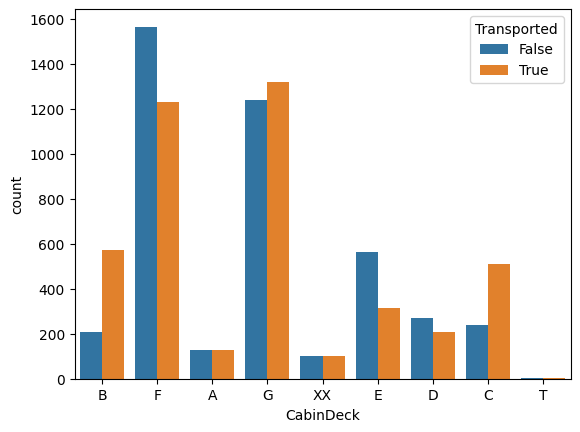

In [7]:
# draw CabinDeck-TransPorted graph
sns.countplot(x="CabinDeck",hue="Transported",data=df)

In [8]:
# change data type
df["CabinNum"] = df["CabinNum"].astype(int)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='CabinNum', ylabel='Count'>

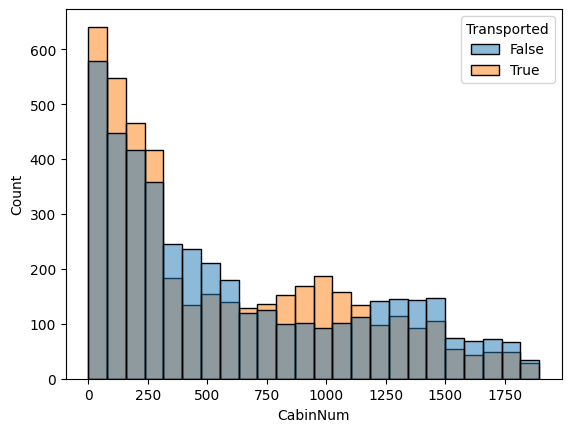

In [9]:
# draw CabinNum-Transported graph
sns.histplot(x="CabinNum",hue="Transported",data=df)

<Axes: xlabel='CabinPort', ylabel='count'>

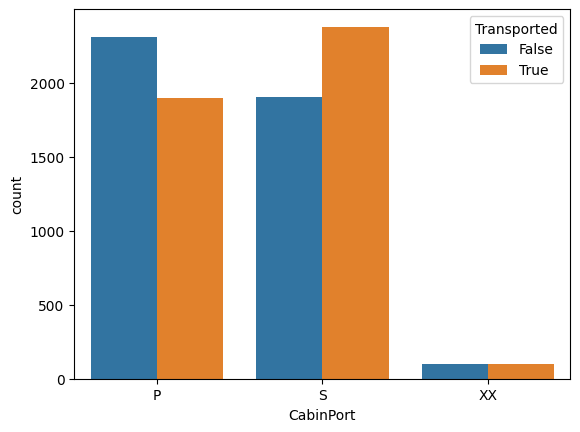

In [10]:
# draw CabinPort-Transported graph
sns.countplot(x="CabinPort",hue="Transported",data=df)